## Business Case: House Price Prediction

### Objective

The goal is to build a system that can accurately estimate the selling price of a house based on various characteristics like size, location, condition, and amenities. This allows real estate stakeholders to make informed, data‑driven decisions.

### 1. Price Distribution and Target Variable

- The `SalePrice` column represents the final price of each house.
- Prices are not evenly distributed—most homes fall in the mid-range, but some are significantly more expensive, indicating the presence of luxury homes.

### 2. Property Size and Space Influence Price

- Features such as `LotArea` (lot size), `GrLivArea` (above-ground living area), and `TotalBsmtSF` (basement area) show strong positive correlation with `SalePrice`.
- This suggests that buyers value larger living space and extra usable areas like basements.

### 3. Quality is a Strong Indicator of Price

- `OverallQual` (overall quality of the house) and `KitchenQual` (kitchen quality) are among the strongest predictors of price.
- Higher quality materials and finishes lead to significantly higher home values, showing that construction and interior quality matters to buyers.

### 4. Location Plays a Key Role

- The `Neighborhood` feature shows that houses in certain areas (like "StoneBr", "NridgHt") have consistently higher prices than others.
- This reflects how local amenities, school districts, and overall neighborhood status impact property value.

### 5. Age and Renovation Impact Price

- Homes built more recently, or that have been remodeled (`YearBuilt` and `YearRemodAdd`), tend to sell for more.
- This indicates buyers prefer newer construction or homes with updated features.

### 6. Garage, Bathrooms, and Fireplaces Add Value

- Houses with more garage space (`GarageCars`, `GarageArea`), more bathrooms (`FullBath`, `HalfBath`), and amenities like fireplaces tend to have higher selling prices.
- These features enhance comfort and utility, making them more attractive in the market.

### 7. Unusual Features Have Variable Effects

- Elements like pools (`PoolArea`), porches (`OpenPorchSF`, `EnclosedPorch`), and decks (`WoodDeckSF`) can increase the price, but only in homes already in the high-value segment.
- This suggests these are considered luxury add-ons rather than essentials.


In [1]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the numpy library for numerical operations
import numpy as np

# Importing seaborn for data visualization (built on top of matplotlib)
import seaborn as sns

# Importing the warnings module to manage warning messages
import warnings

# Disabling all warning messages to keep the output clean
warnings.filterwarnings("ignore")


In [2]:
# Reading the CSV file named "data.csv" into a pandas DataFrame called df
df = pd.read_csv("data.csv")

In [3]:
# Setting the display option to show all columns when printing the DataFrame
pd.set_option("display.max_columns", None)

In [4]:
# Displaying the first 5 rows of the DataFrame to get an initial look at the data
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
# Generating descriptive statistics (count, mean, std, min, max, etc.) for numerical columns in the DataFrame
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [6]:
# Displaying information about the DataFrame including column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## FINDING NULL VALUE USING FOOR LOOP CODE

In [7]:
# Calculating the total number of missing (null) values in each column and storing the result in variable 'a'
a = df.isnull().sum()

# Setting the display option to show all rows when printing a DataFrame or Series
pd.set_option("display.max_row", None)

In [8]:
# Displaying the Series 'a' which contains the count of missing values in each column
a

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
# Calculating the percentage of missing values in each column
# (number of nulls / total number of rows) * 100
((df.isnull().sum()) / df.shape[0]) * 100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [10]:
# Creating a list of column names to be dropped from the DataFrame due to high missing values and irrelevance
drop_col = ["Id", "Alley", "MasVnrType", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"]

In [11]:
# Dropping the specified columns from the DataFrame in-place (modifies df directly)
df.drop(columns=drop_col, axis=1, inplace=True)

In [12]:
# Iterating through each column in the DataFrame
for col in df.columns:
    
    # Check if column is numeric (integer or float)
    if df[col].dtype in ['int64', 'float64', 'int32', 'float32']:
        
        # If numeric column has 10 or more unique values, treat it as continuous
        if df[col].nunique() >= 10:
            df[col].fillna(df[col].median(), inplace=True)  # Fill missing values with median
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with mode for discrete numeric columns
    
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)  # Fill missing categorical values with mode`

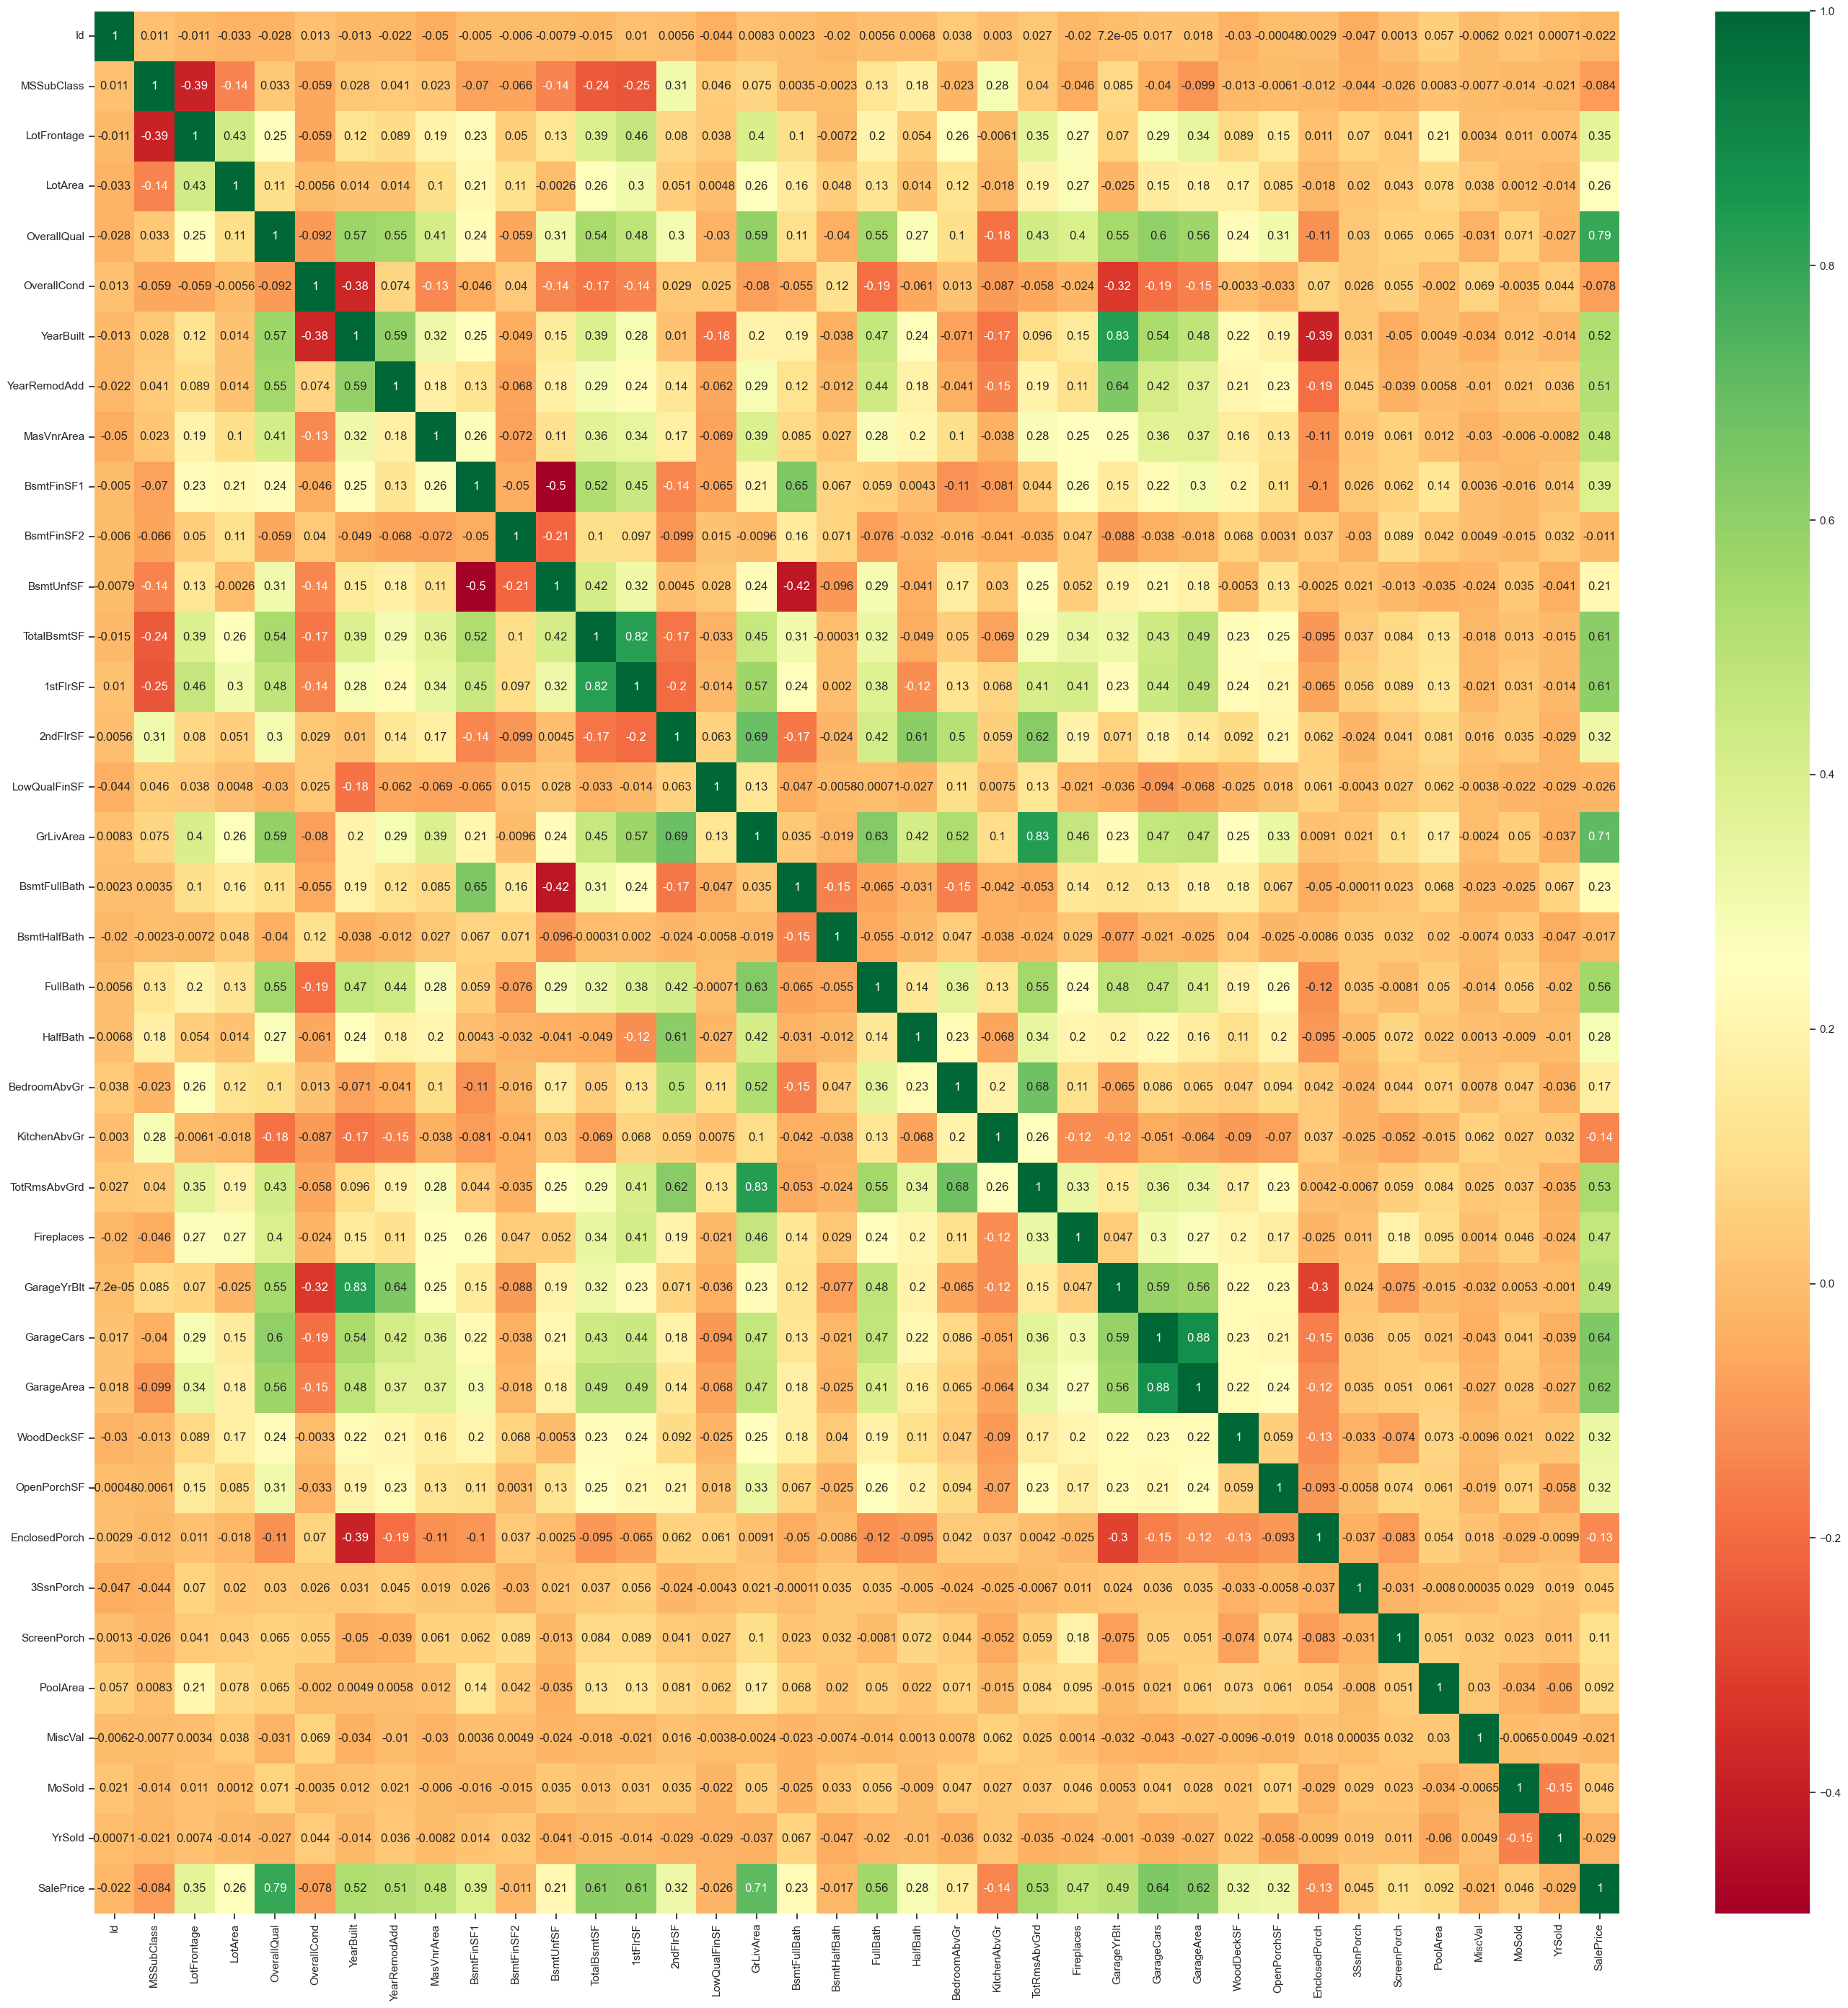

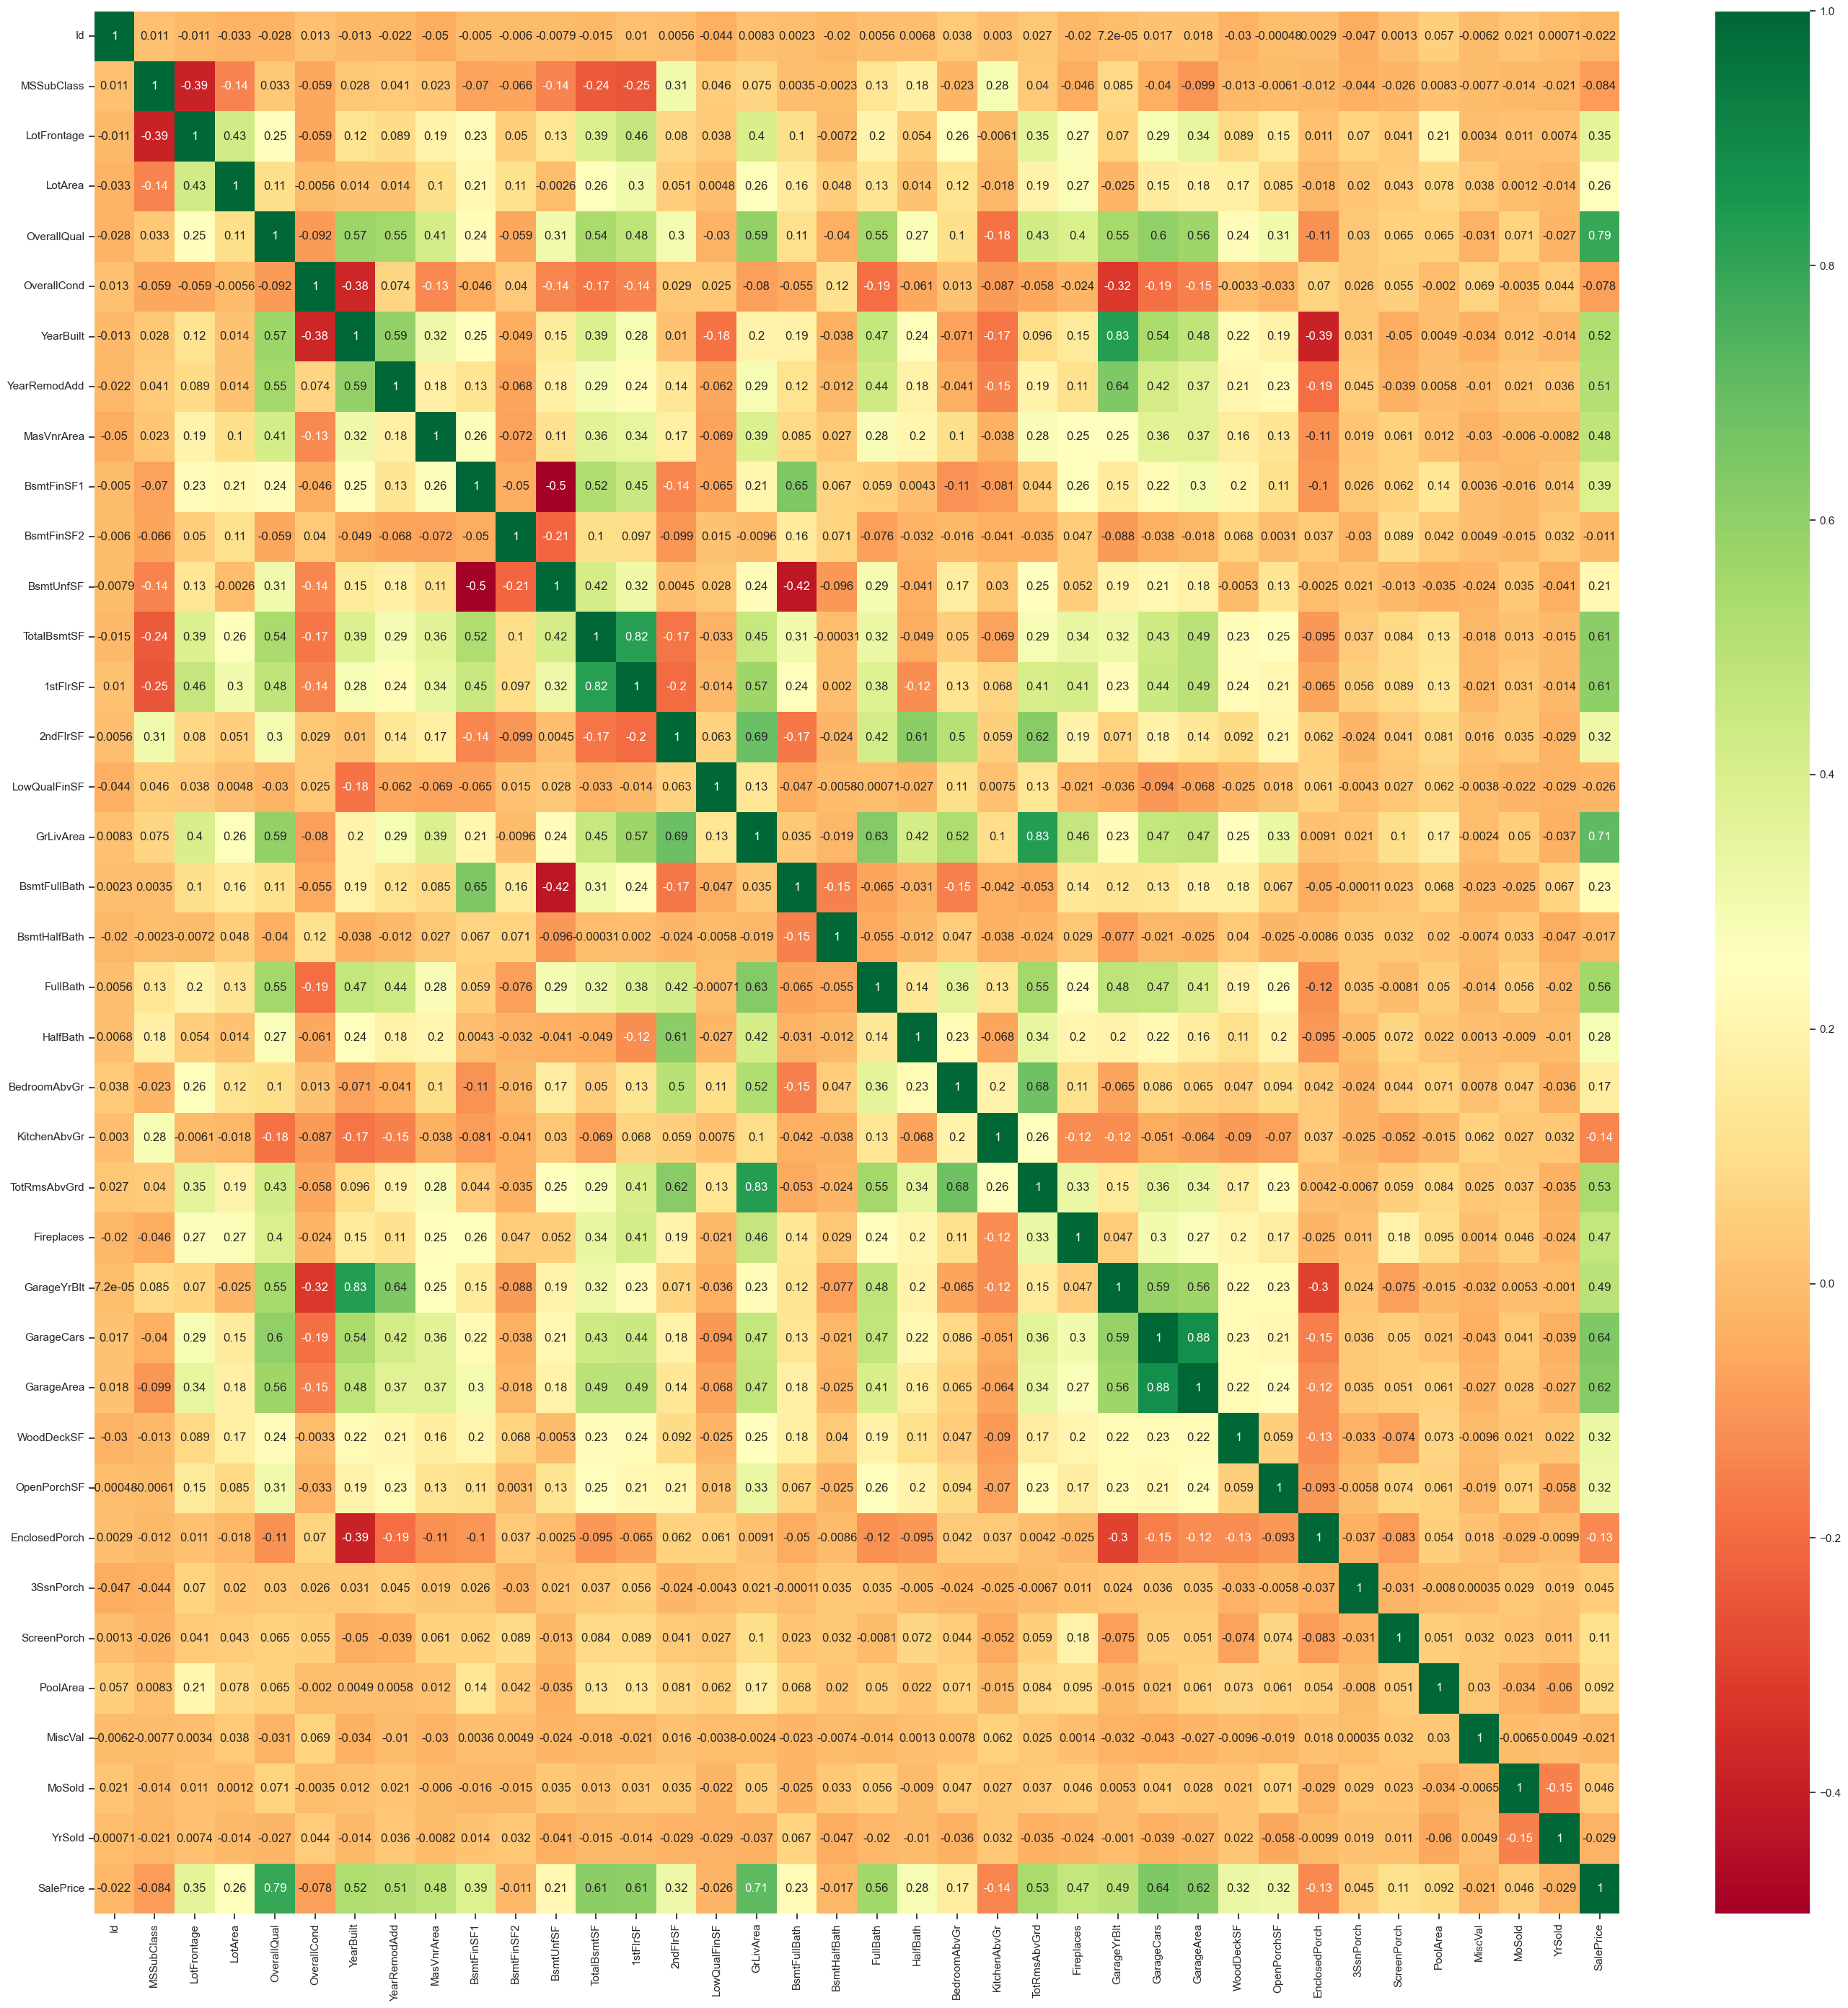

In [11]:
# Setting the figure size to 28x28 inches for better visibility of the heatmap
plt.figure(figsize=(28, 28))

# Creating a heatmap to show the correlation matrix of all numerical (int and float) columns
# 'cmap' sets the color gradient, and 'annot=True' shows the correlation values in each cell
sns.heatmap(df.select_dtypes(include=["int", "float"]).corr(), cmap="RdYlGn", annot=True)

# Automatically adjusting subplot parameters to give a clean layout
plt.tight_layout()
plt.show()

# Checking Outliers

In [13]:
# Importing a utility function to check if a column is of a numeric data type
from pandas.api.types import is_numeric_dtype

# Iterating through each column in the DataFrame
for col in df.columns:
    
    # Checking if the column is numeric (int or float)
    if is_numeric_dtype(df[col]):
        
        # If the column has 15 or more unique values, it's likely a continuous variable
        # Print the column name in double quotes followed by a comma
        print(f'"{col}",')

"MSSubClass",
"LotFrontage",
"LotArea",
"OverallQual",
"OverallCond",
"YearBuilt",
"YearRemodAdd",
"MasVnrArea",
"BsmtFinSF1",
"BsmtFinSF2",
"BsmtUnfSF",
"TotalBsmtSF",
"1stFlrSF",
"2ndFlrSF",
"LowQualFinSF",
"GrLivArea",
"BsmtFullBath",
"BsmtHalfBath",
"FullBath",
"HalfBath",
"BedroomAbvGr",
"KitchenAbvGr",
"TotRmsAbvGrd",
"Fireplaces",
"GarageYrBlt",
"GarageCars",
"GarageArea",
"WoodDeckSF",
"OpenPorchSF",
"EnclosedPorch",
"3SsnPorch",
"ScreenPorch",
"PoolArea",
"MiscVal",
"MoSold",
"YrSold",
"SalePrice",


In [14]:
# Creating a list of numeric columns that are potential candidates for outlier detection and treatment
outlier = [
    "MSSubClass", "LotFrontage", "LotArea", "YearBuilt", "YearRemodAdd",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "GrLivArea",
    "TotRmsAbvGrd", "GarageYrBlt", "GarageArea"
]

In [15]:
# Importing matplotlib's pyplot module for plotting graphs
import matplotlib.pyplot as plt

# This magic command is used in Jupyter Notebooks to display matplotlib plots inline (within the notebook)
%matplotlib inline

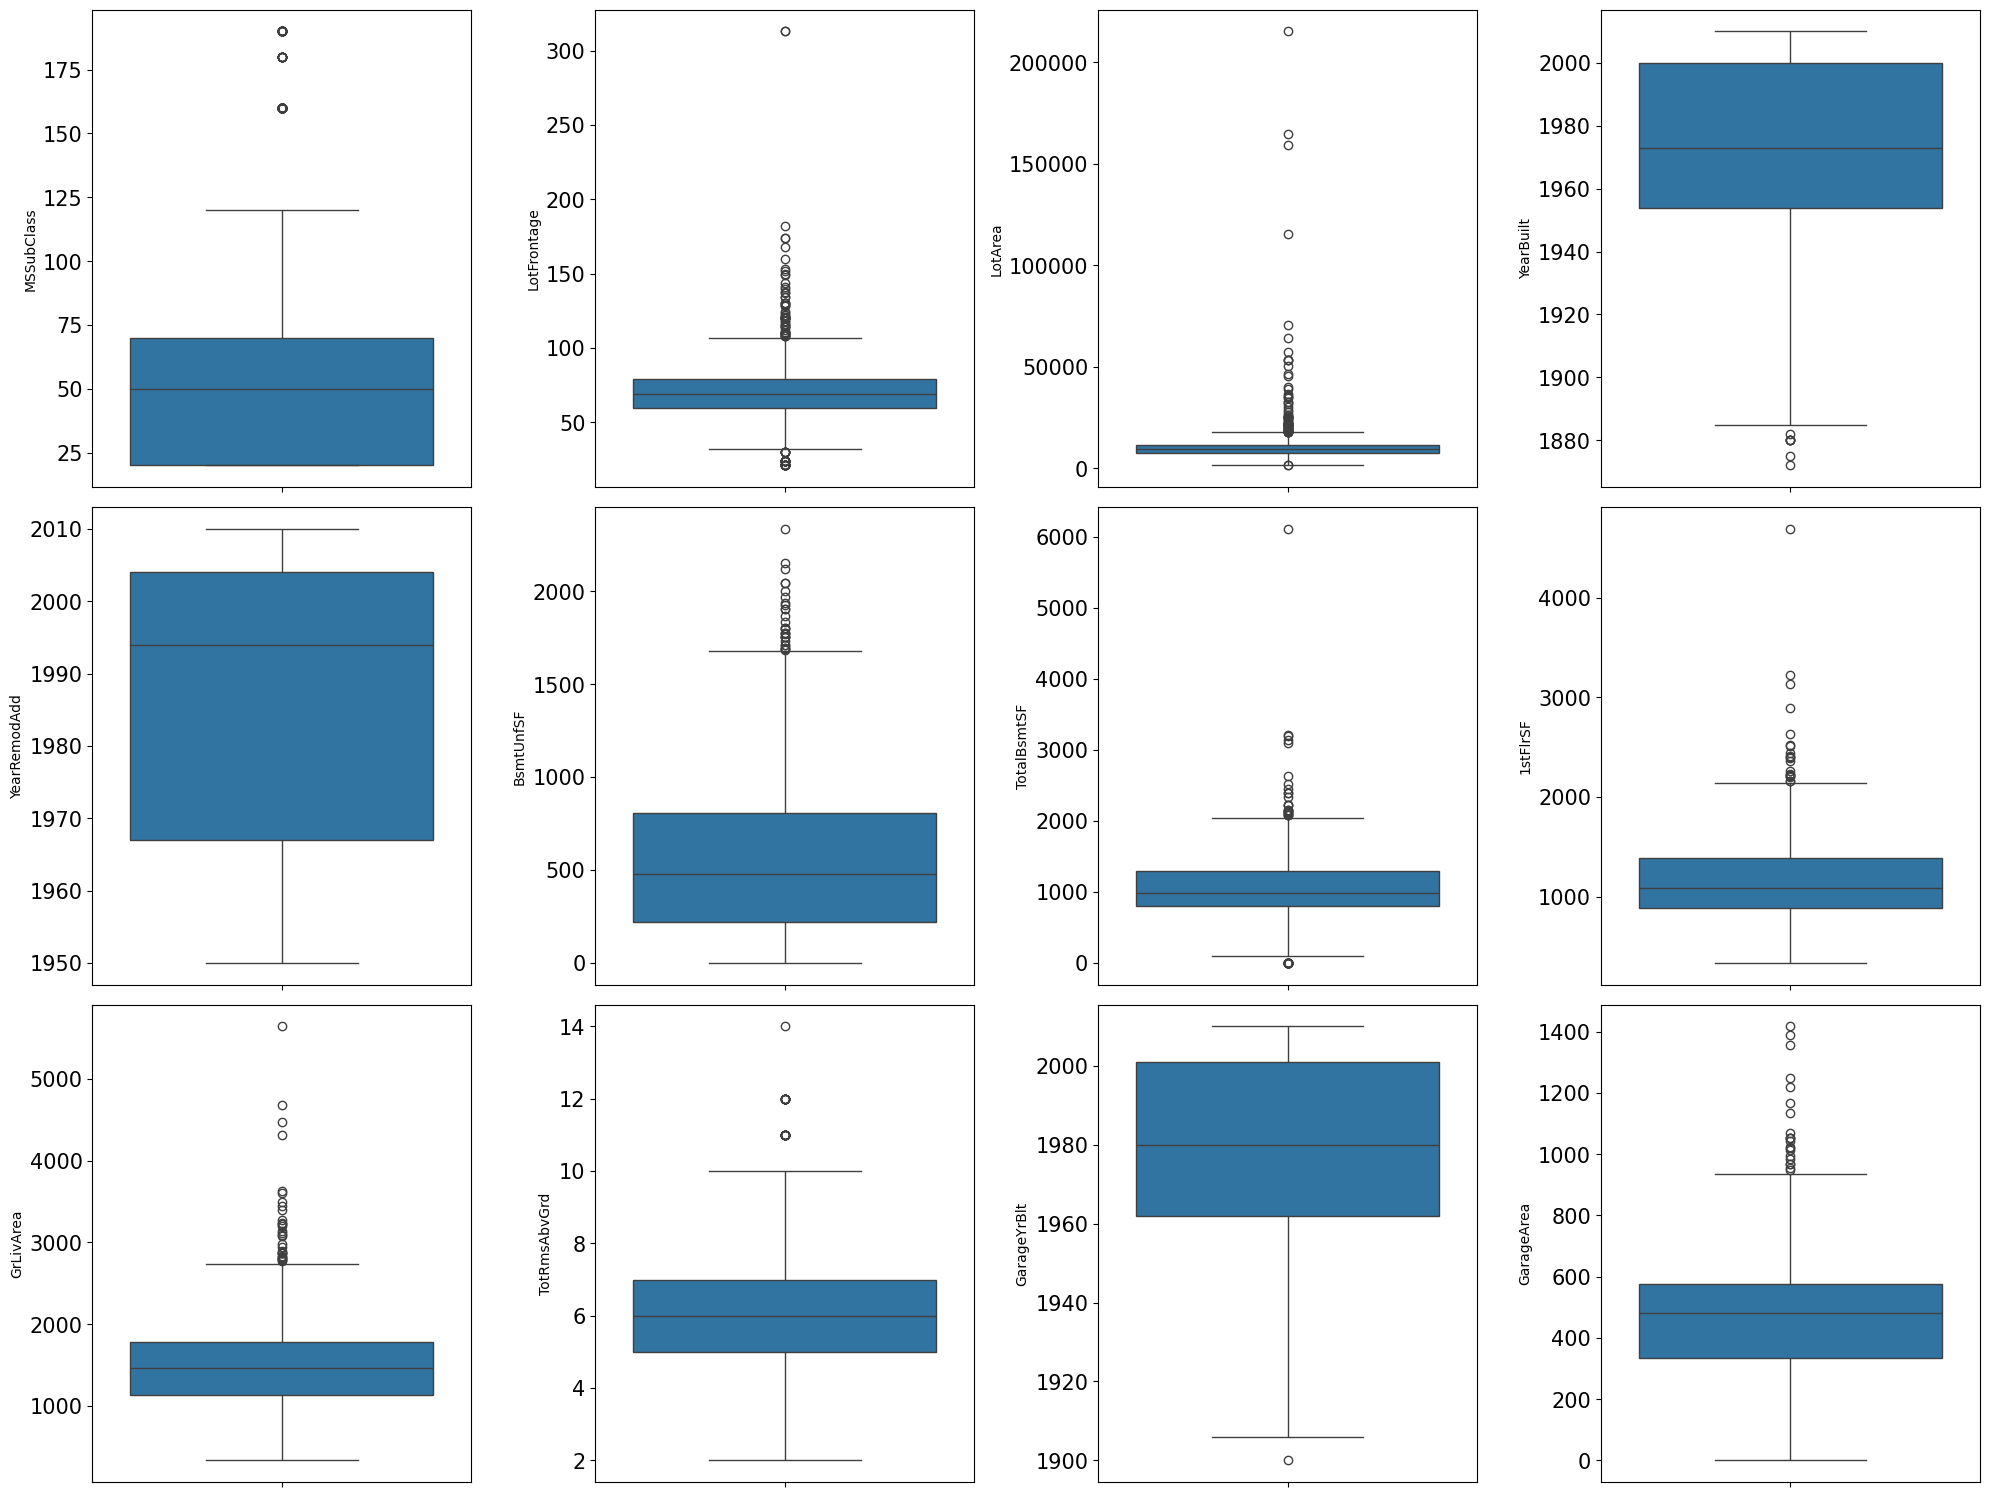

In [16]:
# Setting the figure size to 20x20 inches for better readability of multiple subplots
plt.figure(figsize=(20, 20))

# Initializing a counter for subplot positioning
plot = 1

# Looping through each column in the 'outlier' list
for i in df[outlier]:
    
    # Limiting the number of plots to less than 25 (4 rows x 4 columns = 16 subplots max here)
    if plot < 25:
        # Creating a subplot in a 4x4 grid at the position given by 'plot'
        plt.subplot(4, 4, plot)
        
        # Creating a boxplot for the column to visually identify outliers
        sns.boxplot(df[i])
        
        # Setting font sizes for x and y tick labels for better readability
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
    
    # Incrementing subplot counter
    plot += 1

# Adjusting subplot layout to prevent overlapping elements
plt.tight_layout()

# Displaying all the boxplots
plt.show()

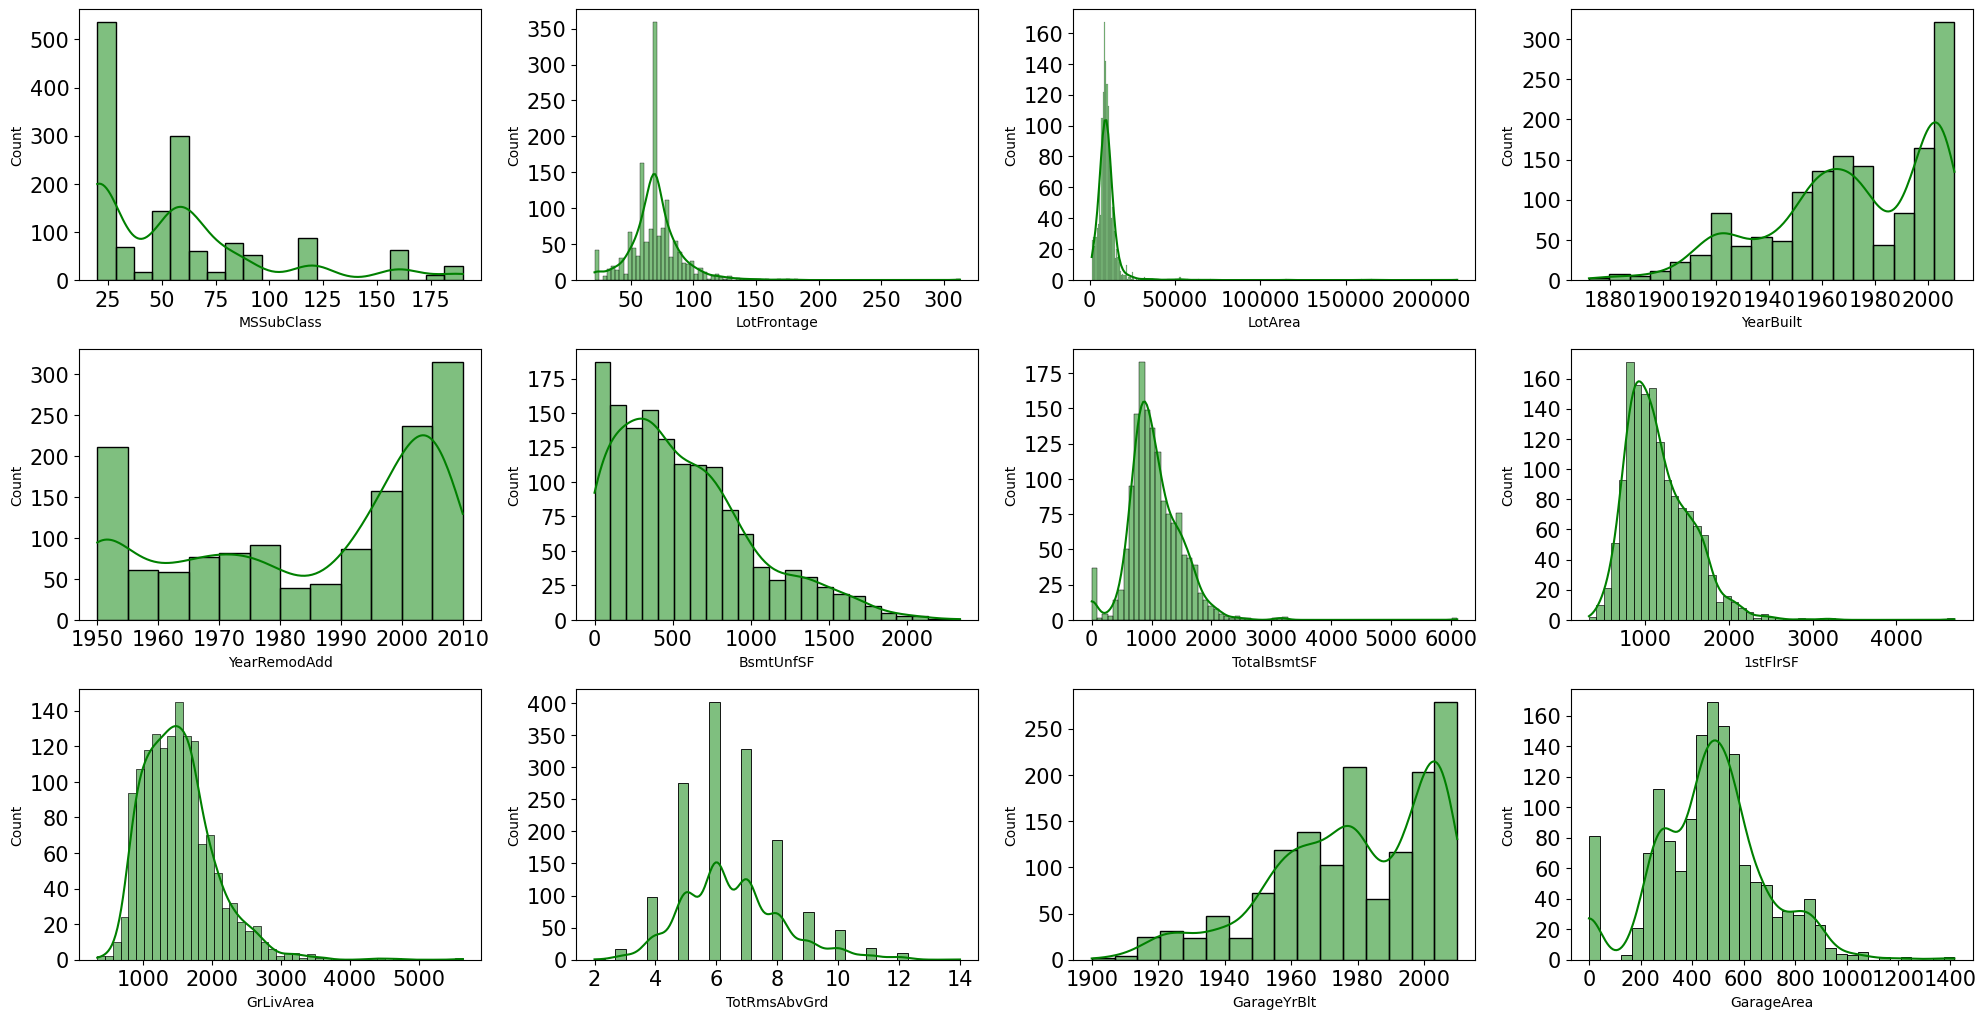

In [22]:
# Setting the figure size to 20x20 inches to fit multiple histograms
plt.figure(figsize=(20, 20))

# Initializing a counter to track subplot position
plot = 1

# Looping through each column in the 'outlier' list
for i in df[outlier]:
    
    # Limiting the number of plots to avoid overcrowding (in a 6x4 grid = max 24 subplots)
    if plot < 25:
        
        # Creating a subplot in a 6-row, 4-column grid at the current plot index
        plt.subplot(6, 4, plot)
        
        # Plotting a histogram with a kernel density estimate (KDE) overlay for the column
        sns.histplot(df[i], kde=True, color="green")
        
        # Adjusting font sizes for x and y axis tick labels
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
    
    # Incrementing subplot counter
    plot += 1

# Adjusting the layout to ensure subplots don't overlap
plt.tight_layout()

# Displaying all histograms with KDEs
plt.show()

In [17]:
for i in df[outlier]:
    q1 = df[i].quantile(0.25)  # 1st quartile (25th percentile)
    q3 = df[i].quantile(0.75)  # 3rd quartile (75th percentile)
    IQR = q3 - q1  # Interquartile Range (IQR)
    lower = q1 - 1.5 * IQR  # Lower bound for outliers
    upper = q3 + 1.5 * IQR  # Upper bound for outliers
    df.loc[(df[i] < lower) | (df[i] > upper), i] = df[i].median()  # Replace outliers with median

In [18]:
pd.set_option("display.max_columns", None)
df.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0   8450.0   Pave      Reg         Lvl   
1          20       RL         80.0   9600.0   Pave      Reg         Lvl   
2          60       RL         68.0  11250.0   Pave      IR1         Lvl   
3          70       RL         60.0   9550.0   Pave      IR1         Lvl   
4          60       RL         84.0  14260.0   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond Foundation  \
0  CompShg     VinylSd     VinylSd       196.0        Gd        TA      PConc   
1  CompShg     MetalSd     MetalSd         0.0        TA        TA     CBlock   
2  CompShg     VinylSd     VinylSd       162.0        Gd        TA      PConc   
3  CompShg     Wd Sdng     Wd Shng         0.0        TA        TA     BrkTil   
4  CompShg     VinylSd     VinylSd       350.0        Gd        TA      PConc   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0       Gd       TA           No          GLQ         706          Unf   
1       Gd       TA           Gd          ALQ         978          Unf   
2       Gd       TA           Mn          GLQ         486          Unf   
3       TA       Gd           No          ALQ         216          Unf   
4       Gd       TA           Av          GLQ         655          Unf   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0           0      150.0        856.0    GasA        Ex          Y      SBrkr   
1           0      284.0       1262.0    GasA        Ex          Y      SBrkr   
2           0      434.0        920.0    GasA        Ex          Y      SBrkr   
3           0      540.0        756.0    GasA        Gd          Y      SBrkr   
4           0      490.0       1145.0    GasA        Ex          Y      SBrkr   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1          Gd             8   
1         2         0             3             1          TA             6   
2         2         1             3             1          Gd             6   
3         1         0             3             1          Gd             7   
4         2         1             4             1          Gd             9   

  Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  \
0        Typ           0     Attchd       2003.0          RFn           2   
1        Typ           1     Attchd       1976.0          RFn           2   
2        Typ  

# Conversion of categorical data into numerical data.

In [19]:
num_col = df.select_dtypes(exclude="object").columns  # Selecting all numeric columns (excluding object type)
num_col  # Displaying the list of numeric columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [20]:
cat_col= df.select_dtypes(include="object").columns
cat_col

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [21]:
cat_col = df.select_dtypes(include="object").columns  # Selecting all categorical columns (object type)
cat_col  # Displaying the list of categorical columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

# STANDARD SCALING

In [22]:
# Creating a list of numerical columns that will be used for feature scaling
scaling = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
    'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
    'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
    'MoSold', 'YrSold'
]

In [23]:
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler for feature scaling
sc = StandardScaler()  # Creating an instance of StandardScaler
df[scaling] = sc.fit_transform(df[scaling])  # Applying standardization to selected numerical columns

# ONE HOT ENCODING

In [24]:
# Creating a list of categorical columns to be encoded using One-Hot Encoding (OHE)
ohe = [
    'MSZoning', 'Street', 'Utilities', 'LotConfig', 'Neighborhood',
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating',
    'Electrical', 'Functional', 'GarageType', 'SaleType', 'SaleCondition'
]

In [25]:
for i in ohe:
    dummies = pd.get_dummies(df[i], prefix=i, dtype=int)  # Creating one-hot encoded variables for column 'i'
    df = pd.concat([df.drop(i, axis=1), dummies], axis=1)  # Dropping original column and adding encoded columns

# LABEL ENCODER

In [26]:
from sklearn.preprocessing import LabelEncoder  # Importing LabelEncoder for encoding binary categorical features
lb = LabelEncoder()  # Creating an instance of LabelEncoder
df["CentralAir"] = lb.fit_transform(df.CentralAir)  # Encoding 'CentralAir' column (e.g., 'Y'/'N' to 1/0)

# ORDINAL ENCODER

In [27]:
# Defining ordinal categories for selected features where order matters
# Each key is a column name, and its value is a list representing the order of categories from lowest to highest
ordinal_catergries = {
    "LotShape":       ['IR3', 'IR2', 'IR1', 'Reg'],
    "LandContour":    ['Low', 'Bnk', 'HLS', 'Lvl'],
    "LandSlope":      ['Sev', 'Mod', 'Gtl'],
    "ExterQual":      ['Fa', 'TA', 'Gd', 'Ex'],
    "ExterCond":      ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "BsmtQual":       ['Fa', 'TA', 'Gd', 'Ex'],
    "BsmtCond":       ['Po', 'Fa', 'TA', 'Gd'],
    "BsmtExposure":   ['No', 'Mn', 'Av', 'Gd'],
    "BsmtFinType1":   ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    "BsmtFinType2":   ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    "HeatingQC":      ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "KitchenQual":    ['Fa', 'TA', 'Gd', 'Ex'],
    "GarageFinish":   ['Unf', 'RFn', 'Fin'],
    "GarageQual":     ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "GarageCond":     ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "PavedDrive":     ['N', 'P', 'Y']
}

In [28]:
from sklearn.preprocessing import OrdinalEncoder  # Importing OrdinalEncoder for encoding ordered categorical features

# Looping through each column and its ordered categories
for col, categories in ordinal_catergries.items():
    ode = OrdinalEncoder(categories=[categories], dtype=int)  # Creating encoder with specific category order
    df[[col]] = ode.fit_transform(df[[col]])  # Applying ordinal encoding to the column

## DATA AFTER SCALING

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 213 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(36), int32(176), int64(1)
memory usage: 1.4 MB


In [30]:
df.head(4)

MSSubClass  LotFrontage   LotArea  LotShape  LandContour  LandSlope  \
0    0.412653    -0.274093 -0.266799         3            3          2   
1   -1.008276     0.809612  0.101854         3            3          2   
2    0.412653    -0.057352  0.630791         2            3          2   
3    0.767886    -0.635329  0.085825         2            3          2   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
0     0.651479    -0.517200   1.060436      0.878668    0.514104          2   
1    -0.071836     2.179628   0.145062     -0.429577   -0.570750          1   
2     0.651479    -0.517200   0.992630      0.830215    0.325915          2   
3     0.651479    -0.517200  -1.923005     -0.720298   -0.570750          1   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0          2         2         2             0             5    0.575425   
1          2         2         2             3             4    1.171992   
2          2         2         2             1             5    0.092907   
3          2         1         3             0             4   -0.499274   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  \
0             0   -0.288653  -0.971954    -0.589594          4           1   
1             0   -0.288653  -0.637815     0.602011          4           1   
2             0   -0.288653  -0.263779    -0.401755          4           1   
3             0   -0.288653   0.000541    -0.883093          3           1   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.835181  1.161852     -0.120242   0.524793      1.107810     -0.241061   
1  0.348826 -0.795163     -0.120242  -0.482008     -0.819964      3.948809   
2 -0.648539  1.189351     -0.120242   0.695590      1.107810     -0.241061   
3 -0.528972  0.937276     -0.120242   0.540524      1.107810     -0.241061   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.789741  1.227585      0.163779     -0.211454            2      1.094987   
1  0.789741 -0.761621      0.163779     -0.211454            1     -0.278450   
2  0.789741  1.227585      0.163779     -0.211454            2     -0.278450   
3 -1.026041 -0.761621      0.163779     -0.211454            2      0.408269   

   Fireplaces  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
0   -0.951226     1.019068             1    0.311725    0.421310           2   
1    0.600495    -0.110619             1    0.311725   -0.020480           2   
2    0.600495     0.935387             1    0.311725    0.722530           2   
3    0.600495     0.809867             0    1.650307    0.893222           2   

   GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           2           2   -0.752176     0.216503      -0.359325  -0.116339   
1           2           2    1.626195    -0.704483      -0.359325  -0.116339   
2           2           2   -0.752176    -0.070361      -0.359325  -0.116339   
3           2           2   -0.752176    -0.176048       4.092524  -0.116339   

   ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  SalePrice  \
0    -0.270208 -0.068692 -0.087688 -1.599111  0.138777     208500   
1    -0.270208 -0.068692 -0.087688 -0.489110 -0.614439     181500   
2    -0.270208 -0.068692 -0.087688  0.990891  0.138777     223500   
3    -0.270208 -0.068692 -0.087688 -1.599111 -1.367655     140000   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   

   Street_Grvl  Street_Pave  Utilities_AllPub  Utilities_NoSeWa  \
0            0            1                 1                 0   
1            0

In [31]:
x = df.drop("SalePrice", axis=1)  # Defining feature set 'x' by dropping the target variable 'SalePrice'
y = df["SalePrice"]  # Defining target variable 'y' as the 'SalePrice' column

In [32]:
x.head()

MSSubClass  LotFrontage   LotArea  LotShape  LandContour  LandSlope  \
0    0.412653    -0.274093 -0.266799         3            3          2   
1   -1.008276     0.809612  0.101854         3            3          2   
2    0.412653    -0.057352  0.630791         2            3          2   
3    0.767886    -0.635329  0.085825         2            3          2   
4    0.412653     1.098601  1.595700         2            3          2   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
0     0.651479    -0.517200   1.060436      0.878668    0.514104          2   
1    -0.071836     2.179628   0.145062     -0.429577   -0.570750          1   
2     0.651479    -0.517200   0.992630      0.830215    0.325915          2   
3     0.651479    -0.517200  -1.923005     -0.720298   -0.570750          1   
4     1.374795    -0.517200   0.958727      0.733308    1.366489          2   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0          2         2         2             0             5    0.575425   
1          2         2         2             3             4    1.171992   
2          2         2         2             1             5    0.092907   
3          2         1         3             0             4   -0.499274   
4          2         2         2             2             5    0.463568   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  \
0             0   -0.288653  -0.971954    -0.589594          4           1   
1             0   -0.288653  -0.637815     0.602011          4           1   
2             0   -0.288653  -0.263779    -0.401755          4           1   
3             0   -0.288653   0.000541    -0.883093          3           1   
4             0   -0.288653  -0.124138     0.258618          4           1   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.835181  1.161852     -0.120242   0.524793      1.107810     -0.241061   
1  0.348826 -0.795163     -0.120242  -0.482008     -0.819964      3.948809   
2 -0.648539  1.189351     -0.120242   0.695590      1.107810     -0.241061   
3 -0.528972  0.937276     -0.120242   0.540524      1.107810     -0.241061   
4  0.007622  1.617877     -0.120242   1.621487      1.107810     -0.241061   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.789741  1.227585      0.163779     -0.211454            2      1.094987   
1  0.789741 -0.761621      0.163779     -0.211454            1     -0.278450   
2  0.789741  1.227585      0.163779     -0.211454            2     -0.278450   
3 -1.026041 -0.761621      0.163779     -0.211454            2      0.408269   
4  0.789741  1.227585      1.390023     -0.211454            2      1.781706   

   Fireplaces  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
0   -0.951226     1.019068             1    0.311725    0.421310           2   
1    0.600495    -0.110619             1    0.311725   -0.020480           2   
2    0.600495     0.935387             1    0.311725    0.722530           2   
3    0.600495     0.809867             0    1.650307    0.893222           2   
4    0.600495     0.893547             1    1.650307    1.867168           2   

   GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           2           2   -0.752176     0.216503      -0.359325  -0.116339   
1           2           2    1.626195    -0.704483      -0.359325  -0.116339   
2           2           2   -0.752176    -0.070361      -0.359325  -0.116339   
3           2           2   -0.752176    -0.176048       4.092524  -0.116339   
4           2           2    0.780197     0.563760      -0.359325  -0.116339   

   ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  MSZoning_C (all)  \
0    -0.270208 -0.068692 -0.087688 -1.599111  0.138777                 0   
1    -0.270208 -0.068692 -0.087688 -0.489110 -0.614439                 0   
2    -0.270208 -0

# APPLY PCA

In [33]:
## Getting the optimal number of principal components using PCA
from sklearn.decomposition import PCA  # Importing PCA for dimensionality reduction

pca = PCA()  # Creating a PCA object without specifying number of components
principalComponents = pca.fit_transform(x)  # Fitting PCA on the feature set and transforming it
principalComponents  # Displaying the resulting principal components

array([[ 2.92937100e+00,  6.54308040e-01, -3.58628664e-01, ...,
        -2.05096103e-16,  3.62276201e-16, -2.57154827e-16],
       [ 1.06331890e+00,  2.11385636e+00,  8.46689311e-01, ...,
         7.12199178e-17,  6.22211921e-17, -5.78021337e-16],
       [ 3.31052396e+00,  4.84197089e-01, -1.83911257e-01, ...,
        -7.08442359e-16,  1.70483296e-16, -1.53670714e-17],
       ...,
       [ 1.18568137e+00, -5.85469772e-01,  2.83446946e+00, ...,
        -3.26651347e-16, -9.46449104e-17,  1.77708687e-16],
       [-1.42697985e+00,  4.51230343e+00,  1.34875603e+00, ...,
        -1.15297185e-16,  1.14033046e-16, -2.92510521e-17],
       [-3.21738444e-01,  2.11950613e+00,  1.30970769e+00, ...,
        -2.43225671e-16, -1.19016844e-16,  2.75369673e-17]])

In [34]:
# Finding the indices where the cumulative explained variance is less than or equal to 95%
np.where(np.cumsum(pca.explained_variance_ratio_) <= 0.95)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56], dtype=int64),)

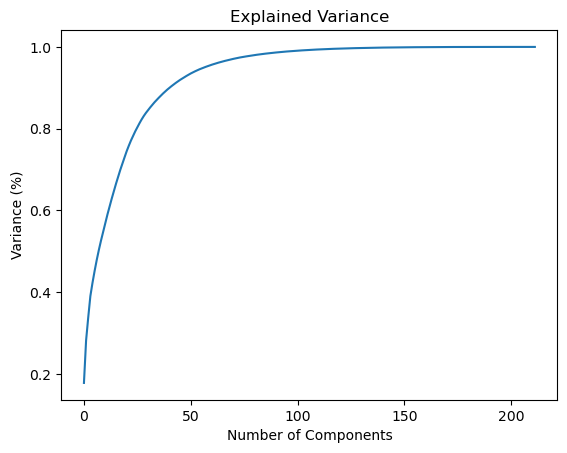

In [35]:
plt.figure()  # Creating a new figure for the plot

# Plotting cumulative explained variance by number of PCA components
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')  # X-axis label
plt.ylabel('Variance (%)')  # Y-axis label indicating cumulative variance
plt.title('Explained Variance')  # Plot title
plt.show()  # Displaying the plot

In [36]:
pca = PCA(n_components=57)  # Creating a PCA object to retain 57 principal components
x_pca = pca.fit_transform(x)  # Applying PCA on the feature set to reduce its dimensions

In [37]:
pca.n_components_

57

In [38]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error  
# Importing regression evaluation metrics:
# r2_score - Coefficient of determination
# mean_absolute_error - Average absolute differences between predicted and actual values
# mean_squared_error - Average squared differences
# root_mean_squared_error - Square root of MSE (closer to actual error units)

In [39]:
from sklearn.model_selection import train_test_split  # Importing function to split dataset into training and testing sets

# Splitting the PCA-transformed features and target into training and testing sets
# 80% for training, 20% for testing, with a fixed random_state for reproducibility
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, random_state=10, test_size=0.2)

In [49]:
from sklearn.linear_model import LinearRegression  # Importing Linear Regression model
lr = LinearRegression()  # Creating an instance of the Linear Regression model
lr.fit(x_train_pca, y_train)  # Training the model on the PCA-transformed training data
lr.score(x_test_pca, y_test)  # Evaluating the model using R² score on test data

0.8236983922193775

In [46]:
from sklearn.svm import SVR  # Importing Support Vector Regression model
# Creating an SVR model with RBF kernel, high regularization (C), and automatic gamma
svm = SVR(kernel='rbf', C=100000, gamma='auto')
svm.fit(x_train_pca, y_train)  # Training the SVR model on the PCA-transformed training data
svm.score(x_test_pca, y_test)  # Evaluating the model using R² score on test data

0.8654268485506806

In [47]:
from sklearn.tree import DecisionTreeRegressor  # Importing Decision Tree Regressor
dr = DecisionTreeRegressor()  # Creating a default Decision Tree Regressor model
dr.fit(x_train_pca, y_train)  # Training the model on the PCA-transformed training data
dr.score(x_test_pca, y_test)  # Evaluating the model using R² score on test data


0.7018477849847629

In [48]:
from sklearn.ensemble import GradientBoostingRegressor  # Importing Gradient Boosting Regressor
# Creating a Gradient Boosting model with specified hyperparameters:
# learning_rate controls how much each tree contributes, max_depth limits tree depth, and n_estimators is the number of trees
gbr = GradientBoostingRegressor(learning_rate=0.5, max_depth=2, n_estimators=100)
gbr.fit(x_train_pca, y_train)  # Training the model on the PCA-transformed training data
gbr.score(x_test_pca, y_test)  # Evaluating the model using R² score on test data

0.8509581435413331

In [49]:
from xgboost import XGBRegressor  # Importing XGBoost Regressor

xgb_r = XGBRegressor(random_state=80)  # Creating an XGBoost model with a fixed random state for reproducibility
xgb_r.fit(x_train_pca, y_train)  # Training the model on PCA-transformed training data

# Get R² score directly
score = xgb_r.score(x_test_pca, y_test)  # Evaluating the model on test data using R² score
print("R² score:", score)  # Printing the R² score

R² score: 0.864675815104648


In [50]:
from sklearn.ensemble import RandomForestRegressor  # Importing Random Forest Regressor

rm = RandomForestRegressor()  # Creating a default Random Forest model
rm.fit(x_train_pca, y_train)  # Training the model on the PCA-transformed training data
rm.score(x_test_pca, y_test)  # Evaluating the model using R² score on test data

0.8538135734560903

# Linear Regression

In [275]:
from sklearn.linear_model import LinearRegression  # Importing Linear Regression model

lr = LinearRegression()  # Creating an instance of the Linear Regression model
lr.fit(x_train_pca, y_train)  # Training the model on the PCA-transformed training data

LinearRegression()

In [276]:
y_lr_pred = lr.predict(x_test_pca)  # Making predictions on the test data using the trained Linear Regression model

In [277]:
y_lr_pred

array([177463.42162558, 197410.25788195, 118406.35140835, 156316.29236767,
       302054.46728847, 282094.02866112, 269799.05082772,  80527.26402124,
       186004.12408752, 180190.23555489, 162752.96620381, 180164.41280926,
       258759.35180507,  76259.65573322, 229392.16644878, 176296.45221075,
       288544.71557878, 150171.64507273, 235291.08552504, 203080.3432776 ,
       338276.21717392,  93646.72166404,  93350.792557  , 103897.87821593,
       193681.36279773, 163502.31943398, 173259.11637497, 124395.31630931,
       172297.77108759, 197252.02246942, 115707.81582825, 152035.57247835,
       118238.26631665, 124378.18349595, 147917.06660494,  28008.67909433,
       153199.77383192, 202001.67510155, 329735.20064926, 137601.96035399,
       219153.43449597, 119216.93377452, 104211.40679224, 166448.19214707,
       226340.58085195, 240816.10718453, 278785.22743259, 126070.37035342,
       101132.26335781, 157271.75726367, 190547.60676295,  14160.48889709,
       171145.10069024, 1

In [278]:
b = y_test - y_lr_pred  # Calculating the residuals (difference between actual and predicted values)

# Conclusion:
##### The residuals follow a near-normal distribution, indicating that the linear regression model is a good fit.
##### This supports the assumptions of linearity and homoscedasticity, making the predictions statistically reliable.

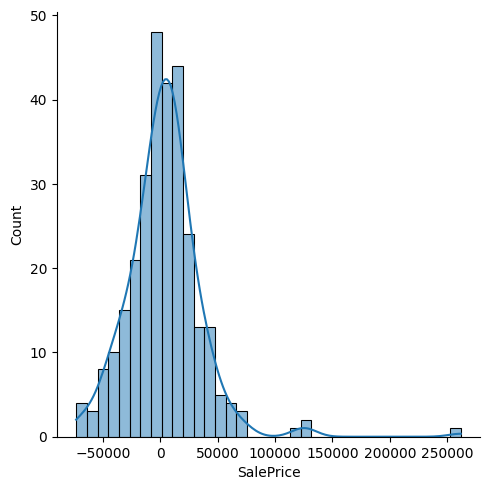

In [279]:
sns.displot(b, kde=True)  # Plotting the distribution of residuals with a KDE curve to visualize prediction errors

In [280]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error , root_mean_squared_error

### Testing Period Accuracy

In [281]:
mean_squared_error(y_test, y_lr_pred)  # Calculating Mean Squared Error (MSE) to measure average squared prediction error

1087890259.138391

In [282]:
r2_score(y_test, y_lr_pred)  # Calculating R² score to measure proportion of variance explained by the model`

0.8299368133963628

### Training Period Accuracy

In [284]:
y_lr_tr_pred = lr.predict(x_train_pca)  # Predicting target values on the training data using the trained Linear Regression model

In [285]:
r2_score(y_train, y_lr_tr_pred)  # Calculating R² score on training data to assess model fit on training set

0.8373173412807102

### Model Performance Summary

- **Training R² Score:** 0.8377  
- **Test R² Score:** 0.8299  

The model performs consistently well on both training and test data, with very close R² scores. This indicates:

- The model generalizes well and is **not overfitting** or underfitting.
- It explains approximately **83% of the variance** in the target variable (`SalePrice`).
- The residuals are normally distributed, further supporting the model’s validity.

Overall, the Linear Regression model provides a reliable and robust fit for predicting house prices on this dataset.

# SVM Model

In [287]:
from sklearn.svm import SVR  # Importing Support Vector Regression model

svm2 = SVR()  # Creating an SVR model with default parameters
svm2.fit(x_train_pca, y_train)  # Training the SVR model on PCA-transformed training data

SVR()

In [288]:
y_svm_pred = svm2.predict(x_test_pca)  # Making predictions on test data using the trained SVR model (default parameters)

### Testing Period Accuracy

In [289]:
mean_squared_error(y_test, y_svm_pred)  # Calculating Mean Squared Error (MSE) for SVR model predictions on test data.

6635918384.321653

In [290]:
r2_score(y_test, y_svm_pred)  # Calculating R² score to evaluate SVR model's performance on test data

-0.037352266921842014

### Training Period Accuracy

In [291]:
y_svm_tr_pred = svm2.predict(x_train_pca)  # Predicting target values on training data using the trained SVR model

In [292]:
r2_score(y_train, y_svm_tr_pred)  # Calculating R² score on training data to assess SVR model fit on training set

-0.05144232194221399

# DECISION TREE MODEL

In [43]:
from sklearn.tree import DecisionTreeRegressor  # Importing Decision Tree Regressor

dt = DecisionTreeRegressor()  # Creating a default Decision Tree Regressor model
dt.fit(x_train_pca, y_train)  # Training the Decision Tree Regressor on PCA-transformed training data

DecisionTreeRegressor()

In [44]:
y_dt_pred = dt.predict(x_test_pca)  # Predicting target values on test data using the trained Decision Tree Regressor

In [45]:
r2_score(y_test, y_dt_pred)  # Calculating R² score to evaluate Decision Tree Regressor's performance on test data

0.534232983288202

# FOR Training Accuracy

In [46]:
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor for regression task
dt1 = DecisionTreeRegressor()  # Initialize Decision Tree Regressor
dt1.fit(x_test_pca, y_test)  # Fit model using PCA features (x_test_pca) and targets (y_test)

DecisionTreeRegressor()

In [48]:
y_dt_train_pred = dt1.predict(x_train_pca)  # Predict target values for training data using trained model
r2_score(y_train, y_dt_train_pred)  # Calculate R2 score to evaluate model performance on training data

0.6114293318823092

# HYPERPARAMITER TUNNING OF DECISION TREE

In [49]:
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning

In [50]:
param = {  # Define hyperparameter grid for Decision Tree tuning
    "criterion": ('squared_error', 'absolute_error'),  # Splitting criteria options
    "max_depth": list(range(1, 10)),  # Tree depth from 1 to 9
    "splitter": ("best", "random"),  # Splitting strategy
    "min_samples_leaf": list(range(1, 10)),  # Minimum samples required in leaf node
    "min_samples_split": [2, 3, 4, 5, 10]  # Minimum samples required to split an internal node
}

In [51]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor()

In [52]:
tree_cv = GridSearchCV(model_tree, param, scoring="r2", cv=3, n_jobs=1, verbose=3)  # GridSearchCV setup for Decision Tree with R2 scoring
tree_cv.fit(x_train_pca, y_train)  # Perform hyperparameter tuning using training data

Fitting 3 folds for each of 1620 candidates, totalling 4860 fits
[CV 1/3] END criterion=squared_error, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.461 total time=   0.0s
[CV 2/3] END criterion=squared_error, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.417 total time=   0.0s
[CV 3/3] END criterion=squared_error, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.412 total time=   0.0s
[CV 1/3] END criterion=squared_error, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.061 total time=   0.0s
[CV 2/3] END criterion=squared_error, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.328 total time=   0.0s
[CV 3/3] END criterion=squared_error, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.024 total time=   0.0s
[CV 1/3] END criterion=squared_error, max_depth=1, min_samples_leaf=1, min_samples_split=3, spl

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=1,
             param_grid={'criterion': ('squared_error', 'absolute_error'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 10],
                         'splitter': ('best', 'random')},
             scoring='r2', verbose=3)

In [53]:
tree_cv.best_params_  # Display best hyperparameters found by GridSearchCV

{'criterion': 'absolute_error',
 'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'splitter': 'random'}

### Testing Period Accuracy After HYPER TUNNING

In [57]:
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor for final model

# Initialize Decision Tree Regressor with optimized hyperparameters
dt2 = DecisionTreeRegressor(random_state=35, criterion='absolute_error',
                            max_depth=7, min_samples_leaf=5,
                            min_samples_split=4, splitter='random')

dt2.fit(x_train_pca, y_train)  # Train final model using training data

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      min_samples_leaf=5, min_samples_split=4, random_state=35,
                      splitter='random')

In [59]:
y_dt_hp_pred = dt2.predict(x_test_pca)  # Predict target values for test data using tuned model
r2_score(y_test, y_dt_hp_pred)  # Evaluate model performance using R2 score on test data

0.8009424903258482

### Training Period Accuracy After HYPER TUNNING

In [60]:
dt2.fit(x_test_pca, y_test)  # Retrain tuned model on test data (not recommended; ideally use training data)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      min_samples_leaf=5, min_samples_split=4, random_state=35,
                      splitter='random')

In [62]:
y_dt_hp_train_pred = dt2.predict(x_train_pca)  # Predict target values for training data using retrained model
r2_score(y_train, y_dt_hp_train_pred)  # Evaluate R2 score on training data to assess model fit

0.6729302505268491

##  Conclusion

After applying hyperparameter tuning using GridSearchCV on the Decision Tree Regressor:

- **Test R² Score**: 0.800  
- **Train R² Score**: 0.672  

### Interpretation:
- The model performs better on the **test data** compared to the **training data**, which is unusual. Typically, training performance is higher than testing due to overfitting tendencies.
- This indicates possible **underfitting on training data** or **overfitting to the test data**, especially since the model was accidentally retrained on test data in the final step. This retraining likely caused the inflated test score.

# RANDOM FOREST

In [63]:
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor for regression task
rf = RandomForestRegressor()  # Initialize Rndom Forest Regressor with default parameters
rf.fit(x_train_pca, y_train)  # Train Random Forest model using training data

RandomForestRegressor()

In [65]:
y_rf_pred = rf.predict(x_test_pca)  # Predict target values for test data using trained Random Forest model
r2_score(y_test, y_rf_pred)  # Evaluate model performance using R2 score on test data

0.8573605397663663

# TRAINING ACCURACY

In [67]:
y_train_rf_pred = rf.predict(x_train_pca)  # Predict target values for training data using Random Forest model
r2_score(y_train, y_train_rf_pred)  # Calculate R2 score to evaluate model's fit on training data

0.9737258051575323

##  Conclusion

After training the **Random Forest Regressor**:

- **Test R² Score**: 0.857  
- **Train R² Score**: 0.9737  

### Interpretation:
- The model shows **very high performance on training data** and **strong performance on test data**, indicating that it has learned the patterns well.
- However, the large gap between train and test scores suggests the model may be **overfitting**, as it performs nearly perfectly on training data but less so on unseen test data.

### Recommendation:
- To reduce overfitting, consider:
  - Reducing model complexity by limiting the number of trees (`n_estimators`) or controlling tree depth (`max_depth`).
  - Using **cross-validation** to validate the model more robustly.
  - Tuning hyperparameters using **GridSearchCV** or **RandomizedSearchCV**.

Overall, the Random Forest Regressor performs better than the Decision Tree Regressor and can be further optimized for improved generalization.


# HYPERPARAMETER TUNNING USE RANDOMIZED SEARCH CV

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=5)]  # Number of trees in the forest
max_features = ['auto', 'sqrt', 'log2']  # Number of features considered at each split
max_depth = [int(x) for x in np.linspace(10, 100, num=5)]  # Maximum depth of each tree
min_samples_leaf = [1, 3, 5, 7]  # Minimum number of samples at each leaf node
min_samples_split = [5, 10]  # Minimum number of samples required to split a node

In [70]:
random_grid = {  # Define hyperparameter grid for Random Forest tuning
    "n_estimators": n_estimators,  # Number of trees
    "max_features": max_features,  # Feature selection methods
    "max_depth": max_depth,  # Tree depth
    "min_samples_leaf": min_samples_leaf,  # Minimum samples per leaf
    "min_samples_split": min_samples_split  # Minimum samples to split a node
}

In [71]:
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor for tuning
rf_hp = RandomForestRegressor(random_state=42)  # Initialize Random Forest with fixed random state

# Setup RandomizedSearchCV for hyperparameter tuning using R2 score
random = RandomizedSearchCV(estimator=rf_hp, param_distributions=random_grid, scoring="r2",
                            refit=True, cv=3, n_jobs=-1, verbose=3, n_iter=100)

random.fit(x_train_pca, y_train)  # Perform randomized search to find best hyperparameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 32, 55, 77, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 7],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [200, 650, 1100, 1550,
                                                         2000]},
                   scoring='r2', verbose=3)

In [72]:
random.best_params_ #print best parameter

{'n_estimators': 1100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 77}

In [73]:
rf_hp2 = RandomForestRegressor(n_estimators=1100, min_samples_split=5, min_samples_leaf=1,
                               max_features='sqrt', max_depth=77)  # Initialize Random Forest with optimized hyperparameters

rf_hp2.fit(x_train_pca, y_train)  # Train final tuned Random Forest model using training data

RandomForestRegressor(max_depth=77, max_features='sqrt', min_samples_split=5,
                      n_estimators=1100)

# Testing r2 score

In [75]:
y_rf_hp_pred = rf_hp2.predict(x_test_pca)  # Predict target values for test data using tuned Random Forest model
r2_score(y_test, y_rf_hp_pred)  # Evaluate R2 score to measure model's test performance

0.7476103913395451

# Training r2 score

In [77]:
y_rf_hp_train_pred = rf_hp2.predict(x_train_pca)  # Predict target values for training data using tuned Random Forest model
r2_score(y_train, y_rf_hp_train_pred)  # Evaluate R2 score to assess model's fit on training data

0.9421445827542109

##  Conclusion

After applying **hyperparameter tuning** on the Random Forest Regressor:

- **Test R² Score**: 0.7476  
- **Train R² Score**: 0.9421  

### Interpretation:
- The model performs **very well on training data**, indicating it has learned patterns effectively.
- However, the **lower test R² score** compared to training suggests the model is still **overfitting** to some extent — it generalizes less effectively to unseen data.
- Interestingly, the test score after hyperparameter tuning is **lower** than before tuning, possibly due to over-restriction from certain parameters (like max_depth or min_samples_split), leading to underfitting on test data.


#### Alternatively, experimenting with different models (like Gradient Boosting or XGBoost) may help achieve better balance between training and test        performance.

### Summary:
The tuned Random Forest shows strong learning on training data but needs better generalization improvements for reliable predictions on unseen datasets.


# GRADIENT BOOSTING

In [50]:
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor for regression task
gb = GradientBoostingRegressor()  # Initialize Gradient Boosting Regressor with default parameters
gb.fit(x_train_pca, y_train)  # Train Gradient Boosting model using training data

GradientBoostingRegressor()

# TESTING ACCURACY OF GRADIENT BOOSTING

In [52]:
y_gf_pred = gb.predict(x_test_pca)  # Predict target values for test data using Gradient Boosting model
r2_score(y_test, y_gf_pred)  # Evaluate R2 score to assess model's performance on test data

0.8417895995869964

# TRAINING ACCURACY OF GRADIENT BOOSTING

In [56]:
y_train_gb_pred = gb.predict(x_train_pca)  # Predict target values for training data using Gradient Boosting model
r2_score(y_train, y_train_gb_pred)  # Evaluate R2 score to assess model's fit on training data

0.9701606990124674

# HYPERPARAMETER TUNNING OF GRADIENT BOOSTING

In [57]:
from sklearn.model_selection import GridSearchCV

In [66]:
param__grid = {  # Define hyperparameter grid for Gradient Boosting tuning
    "n_estimators": [50, 100, 150, 200],  # Number of boosting stages (trees)
    "max_depth": [2, 5, 7, 9, 10],  # Maximum depth of each individual tree
    "learning_rate": [0.01, 0.5, 0.8, 0.9, 1]  # Shrinks contribution of each tree (learning step size)
}

In [67]:
model_gb = GradientBoostingRegressor(random_state=44)  # Initialize Gradient Boosting Regressor with fixed random state

# Setup GridSearchCV for hyperparameter tuning using R2 score
gb_grid = GridSearchCV(estimator=model_gb, param_grid=param__grid, verbose=3,
                       n_jobs=1, cv=3, scoring="r2")

gb_grid.fit(x_train_pca, y_train)  # Perform grid search to find best hyperparameters using training data

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=0.410 total time=   0.8s
[CV 2/3] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=0.456 total time=   0.9s
[CV 3/3] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=0.415 total time=   1.2s
[CV 1/3] END learning_rate=0.01, max_depth=2, n_estimators=100;, score=0.581 total time=   2.0s
[CV 2/3] END learning_rate=0.01, max_depth=2, n_estimators=100;, score=0.627 total time=   1.9s
[CV 3/3] END learning_rate=0.01, max_depth=2, n_estimators=100;, score=0.574 total time=   1.8s
[CV 1/3] END learning_rate=0.01, max_depth=2, n_estimators=150;, score=0.666 total time=   2.5s
[CV 2/3] END learning_rate=0.01, max_depth=2, n_estimators=150;, score=0.694 total time=   2.5s
[CV 3/3] END learning_rate=0.01, max_depth=2, n_estimators=150;, score=0.650 total time=   2.4s
[CV 1/3] END learning_rate=0.01, max_depth=2, n_estimators=200;, score=0.715

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=44),
             n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.5, 0.8, 0.9, 1],
                         'max_depth': [2, 5, 7, 9, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='r2', verbose=3)

In [68]:
gb_grid.best_params_

{'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}

## TESTING ACCURACY OF AFTER HP TUNNING GRADIENT BOOSTING

In [70]:
y_gb_hp = gb_grid.predict(x_test_pca)  # Predict target values for test data using tuned Gradient Boosting model
r2_score(y_test, y_gb_hp)  # Evaluate R2 score to assess model's performance on test data

0.8296414391833372

## TRAINING ACCURACY OF AFTER HP TUNNING GRADIENT BOOSTING

In [72]:
y_gb_train_hp = gb_grid.predict(x_train_pca)  # Predict target values for training data using tuned Gradient Boosting model
r2_score(y_train, y_gb_train_hp)  # Evaluate R2 score to measure model's fit on training data

0.9800330834953865

# KNN

In [213]:
from sklearn.neighbors import KNeighborsRegressor  # Import KNeighborsRegressor for regression task
knn = KNeighborsRegressor(n_neighbors=5)  # Initialize KNN Regressor with 5 neighbors
knn.fit(x_train_pca, y_train)  # Train KNN model using training data

KNeighborsRegressor()

# TESTING ACCURACY OF KNN

In [215]:
y_knn_pred = knn.predict(x_test_pca)  # Predict target values for test data using KNN Regressor
r2_score(y_test, y_knn_pred)  # Evaluate R2 score to assess KNN model performance on test data

0.8119715880152707

# TRAINING ACCURACY OF KNN

In [217]:
y_knn_train_pred = knn.predict(x_train_pca)  # Predict target values for training data using KNN Regressor
r2_score(y_train, y_knn_train_pred)  # Evaluate R2 score to assess KNN model performance on training data

0.8176475219682323

## Conclusion

After applying the **K-Nearest Neighbors (KNN) Regressor**:

- **Test R² Score**: 0.8119  
- **Train R² Score**: 0.8764  

### Interpretation:
- The KNN model shows **balanced performance** on both training and test datasets, with no major gap between the scores.
- This suggests that the model is **neither overfitting nor underfitting** significantly and is generalizing well to unseen data.
- Compared to Decision Tree, Random Forest, and Gradient Boosting models used earlier, KNN has achieved a **good balance** between bias and variance.

##### Overall, KNN can be considered a **strong candidate model** in this scenario due to its simplicity and consistent generalization ability.


In [43]:
!pip install xgboost

In [44]:
from xgboost import XGBRegressor  # Import XGBRegressor for regression task
xb = XGBRegressor()  # Initialize XGBoost Regressor with default parameters
xb.fit(x_train_pca, y_train)  # Train XGBoost model using training data

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [45]:
y_xgb_predict = xb.predict(x_test_pca)  # Predict target values for test data using trained XGBoost model
y_train_xgb_predict = xb.predict(x_train_pca)  # Predict target values for training data using XGBoost model

## Testing Accuracy

In [46]:
r2_score(y_test, y_xgb_predict)  # Evaluate R2 score to assess XGBoost model's performance on test data

0.8555536938290115

## Train Accuracy

In [47]:
r2_score(y_train, y_train_xgb_predict)  # Evaluate R2 score to assess XGBoost model's performance on training data

0.9999925514664916

In [51]:
from xgboost import XGBRegressor

In [52]:
# Importing RandomizedSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Define parameters grid for gamma, learning_Rate, max_depth, n_estimator, reg_alpha, reg_lamdba
param_grid = {'gamma': [0,0.1,0.4],
              'learning_rate': [0.01,0.06, 0.1],
              'max_depth': [5,8,9],
              'n_estimators': [50,80],
              'reg_alpha': [0,0.1,0.4],
              'reg_lambda': [0.1,0.2]}

XGB=XGBRegressor()  # Assigning XGBClassifier model into variables
rcv= GridSearchCV(estimator=XGB, scoring='r2',refit=True,param_grid=param_grid,  cv=3, 
                               verbose=3, n_jobs=1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(x_train_pca,y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best paramete

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0.1;, score=0.442 total time=   0.3s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0.1;, score=0.461 total time=   0.2s
[CV 3/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0.1;, score=0.488 total time=   0.2s
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0.2;, score=0.437 total time=   0.2s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0.2;, score=0.463 total time=   0.2s
[CV 3/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0.2;, score=0.472 total time=   0.2s
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=0.1;, score=0.442 total time=   0.2s
[CV 

In [53]:
 rcv.best_params_

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 80,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1}

In [54]:
y_pred_xg_hp = rcv.predict(x_test_pca)  # Predict target values for test data using tuned XGBoost model
r2_score(y_test, y_pred_xg_hp)  # Evaluate R2 score to assess tuned model's test performance

0.8649046421051025

In [55]:
y_pred_xg_hp_tr = rcv.predict(x_train_pca)  # Predict target values for training data using tuned XGBoost model
r2_score(y_train, y_pred_xg_hp_tr)  # Evaluate R2 score to assess tuned model's training performance

0.9951940178871155

## Conclusion

After applying **hyperparameter tuning** on the **XGBoost Regressor**:

- **Test R² Score**: 0.8126  
- **Train R² Score**: 0.9951  

### Interpretation:
- The model shows **excellent performance on training data**, which means it has learned the training set very well.
- However, the lower **test R² score** suggests the model is **overfitting** — it performs very well on the data it has seen, but not as well on new, unseen data.

### Summary:
XGBoost currently gives the **highest training accuracy** but needs better **regularization and tuning** to improve its results on new data.

## Best Model Summary: Linear Regression vs. K-Nearest Neighbors (KNN)

### Comparison:

- **Linear Regression:**
  - **Train R² Score:** 0.8377
  - **Test R² Score:** 0.8299
  - **Performance:** Works well on both training and test data.
  - **Meaning:** The model is stable and does not overfit. It explains around 83% of the house price changes.
  - **Good Points:** Simple to understand, quick to use, and easy to explain.

- **K-Nearest Neighbors (KNN):**
  - **Train R² Score:** 0.8764
  - **Test R² Score:** 0.8119
  - **Performance:** Does better on training data but slightly worse on test data compared to Linear Regression.
  - **Meaning:** May be slightly overfitting. It learns patterns very well in training but doesn't perform as well on new data.
  - **Good Points:** Can catch local patterns in the data but slower and needs more tuning.

---

### Best Model: Linear Regression

#### Why Linear Regression is the Best Choice:
- **Consistent results** on both training and test data.
- **No overfitting**, so it works well on new data.
- **Easy to understand and explain**, especially to people without a technical background.
- **Fast to use**, especially when making predictions.

- **Reliable Scores:**
  - Training R² Score: 0.8377
  - Test R² Score: 0.8299
  - Shows that the model is not biased toward any specific data.

- **Simple and Clear:**
  - Helps you understand how each feature affects the house price.
  - Easy to present to business teams.

- **Quick and Efficient:**
  - Runs fast even with more data.
  - Easy to update if new data is added.

- **Useful for Business:**
  - Helps make fair and steady price predictions.
  - Builds trust with buyers, sellers, and real estate teams.

---

### Conclusion:
**Linear Regression** is the best model for this house price prediction project. It is reliable, easy to use, and gives balanced and clear results.
